In [2]:
%pip install google.colab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
import os

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import matplotlib.dates as mdates

import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

# NVIDIA Stocks Data 2025

In [5]:
NVIDIA_Stocks = pd.read_csv('NVDA.csv')
NVIDIA_Stocks

,Date,Adj Close,Close,High,Low,Open,Volume
0,1999-01-22,0.037615,0.041016,0.048828,0.038802,0.043750,2714688000
1,1999-01-25,0.041556,0.045313,0.045833,0.041016,0.044271,510480000
2,1999-01-26,0.038331,0.041797,0.046745,0.041146,0.045833,343200000
3,1999-01-27,0.038212,0.041667,0.042969,0.039583,0.041927,244368000
4,1999-01-28,0.038092,0.041536,0.041927,0.041276,0.041667,227520000
...,...,...,...,...,...,...,...
6553,2025-02-10,133.570007,133.570007,135.000000,129.960007,130.089996,216989100
6554,2025-02-11,132.800003,132.800003,134.479996,131.020004,132.580002,178902400
6555,2025-02-12,131.139999,131.139999,132.240005,129.080002,130.020004,160278600
6556,2025-02-13,135.289993,135.289993,136.500000,131.169998,131.559998,197430000


In [6]:
# Check for missing data
missing_data = NVIDIA_Stocks.isnull().sum()
print("Missing Data:\n", missing_data)

Missing Data:
 Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [7]:
# Ensure the 'Date' column is in datetime format
NVIDIA_Stocks['Date'] = pd.to_datetime(NVIDIA_Stocks['Date'])

In [8]:
NVIDIA_Stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6558 entries, 0 to 6557
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6558 non-null   datetime64[ns]
 1   Adj Close  6558 non-null   float64       
 2   Close      6558 non-null   float64       
 3   High       6558 non-null   float64       
 4   Low        6558 non-null   float64       
 5   Open       6558 non-null   float64       
 6   Volume     6558 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 358.8 KB


In [9]:
NVIDIA_Stocks.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,6558,6558.000000,6558.000000,6558.000000,6558.000000,6558.000000,6.558000e+03
mean,2012-02-02 07:47:15.864592896,8.768532,8.795447,8.956567,8.618315,8.795850,5.991103e+08
min,1999-01-22 00:00:00,0.031286,0.034115,0.035547,0.033333,0.034896,1.968000e+07
25%,2005-07-29 18:00:00,0.257739,0.281042,0.288511,0.273354,0.280810,3.384780e+08
50%,2012-02-01 12:00:00,0.437176,0.466083,0.472875,0.459250,0.466584,5.002635e+08
75%,2018-08-07 18:00:00,4.597059,4.644625,4.724000,4.588750,4.632437,7.307002e+08
max,2025-02-14 00:00:00,149.429993,149.429993,153.130005,147.820007,153.029999,9.230856e+09
std,NaN,23.907205,23.904882,24.349618,23.419200,23.922708,4.307236e+08


## NVIDIA Stock Price Over Time

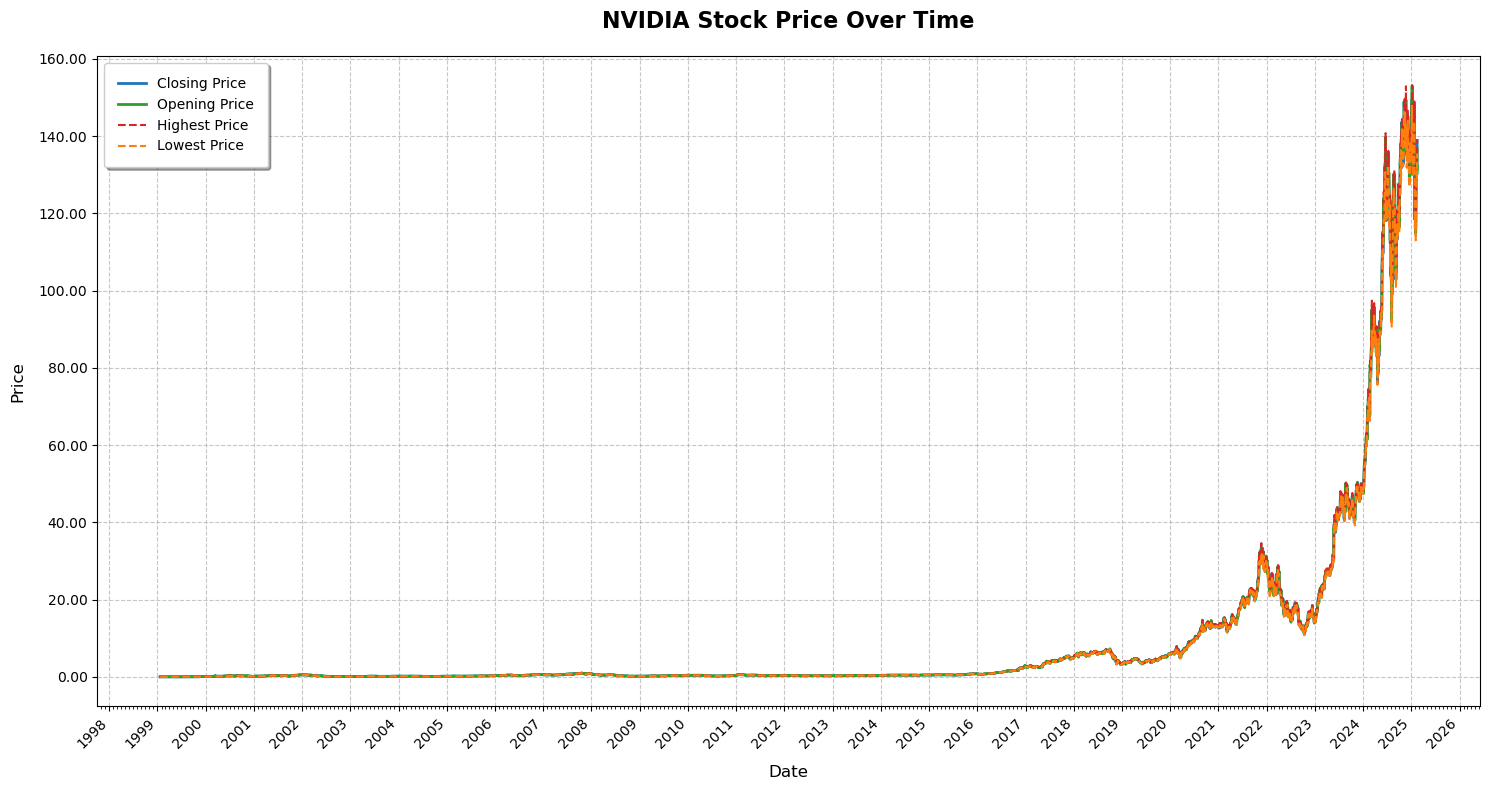

In [10]:
# Create the plot
plt.figure(figsize=(15, 8))
plt.plot(NVIDIA_Stocks['Date'], NVIDIA_Stocks['Close'], label='Closing Price', color='#1f77b4', linewidth=2)
plt.plot(NVIDIA_Stocks['Date'], NVIDIA_Stocks['Open'], label='Opening Price', color='#2ca02c', linewidth=2)
plt.plot(NVIDIA_Stocks['Date'], NVIDIA_Stocks['High'], label='Highest Price', color='#d62728', linestyle='--', linewidth=1.5)
plt.plot(NVIDIA_Stocks['Date'], NVIDIA_Stocks['Low'], label='Lowest Price', color='#ff7f0e', linestyle='--', linewidth=1.5)

# Add title and labels
plt.title('NVIDIA Stock Price Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Price', fontsize=12, labelpad=10)

# Optimize xticks
# Use YearLocator and MonthLocator to format x-axis ticks
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks for each year
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks for each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks as years

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Optimize yticks
# Format y-axis labels to display two decimal places
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize legend
plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True, borderpad=1)

# Add a tight layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

## NVIDIA Trading Volume

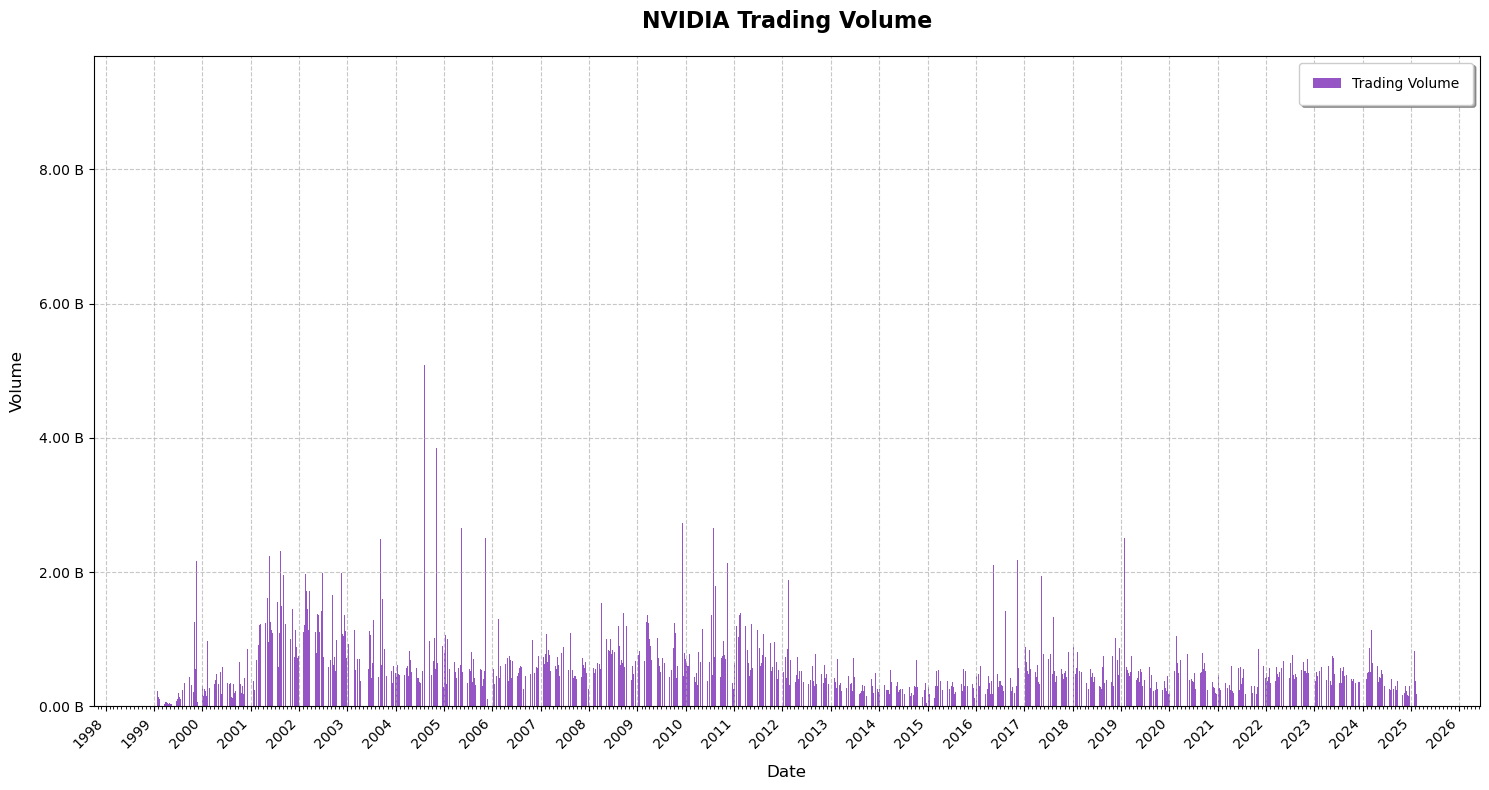

In [11]:
# Create the plot
plt.figure(figsize=(15, 8))
plt.bar(NVIDIA_Stocks['Date'], NVIDIA_Stocks['Volume'], color='#6a0dad', alpha=0.7, label='Trading Volume')

# Add title and labels
plt.title('NVIDIA Trading Volume', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Volume', fontsize=12, labelpad=10)

# Optimize xticks
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks for each year
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks for each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks as years

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Optimize yticks
# Format y-axis labels to display volume with two decimal places in billions
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1e9:.2f} B'))

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize legend
plt.legend(loc='upper right', fontsize=10, frameon=True, shadow=True, borderpad=1)

# Add a tight layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Moving Averages

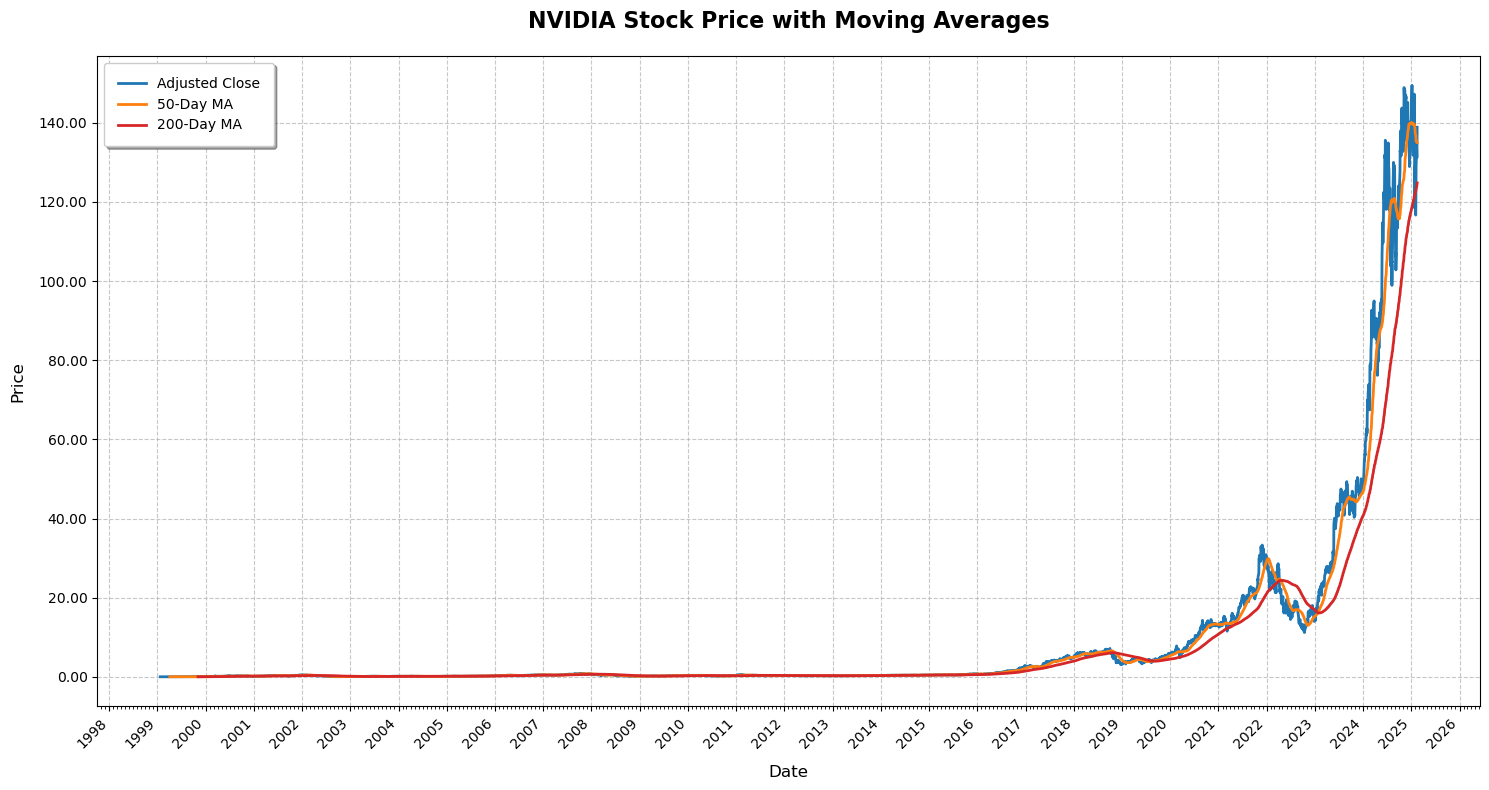

In [12]:
# Calculate Moving Averages
NVIDIA_Stocks['50_day_MA'] = NVIDIA_Stocks['Adj Close'].rolling(window=50).mean()
NVIDIA_Stocks['200_day_MA'] = NVIDIA_Stocks['Adj Close'].rolling(window=200).mean()

# Create the plot
plt.figure(figsize=(15, 8))
plt.plot(NVIDIA_Stocks['Date'], NVIDIA_Stocks['Adj Close'], label='Adjusted Close', color='#1f77b4', linewidth=2)
plt.plot(NVIDIA_Stocks['Date'], NVIDIA_Stocks['50_day_MA'], label='50-Day MA', color='#ff7f0e', linewidth=2)
plt.plot(NVIDIA_Stocks['Date'], NVIDIA_Stocks['200_day_MA'], label='200-Day MA', color='#d62728', linewidth=2)

# Add title and labels
plt.title('NVIDIA Stock Price with Moving Averages', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Price', fontsize=12, labelpad=10)

# Optimize xticks
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks for each year
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks for each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks as years

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Optimize yticks
# Format y-axis labels to display two decimal places
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize legend
plt.legend(loc='upper left', fontsize=10, frameon=True, shadow=True, borderpad=1)

# Add a tight layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

## NVIDIA Stock Volatility

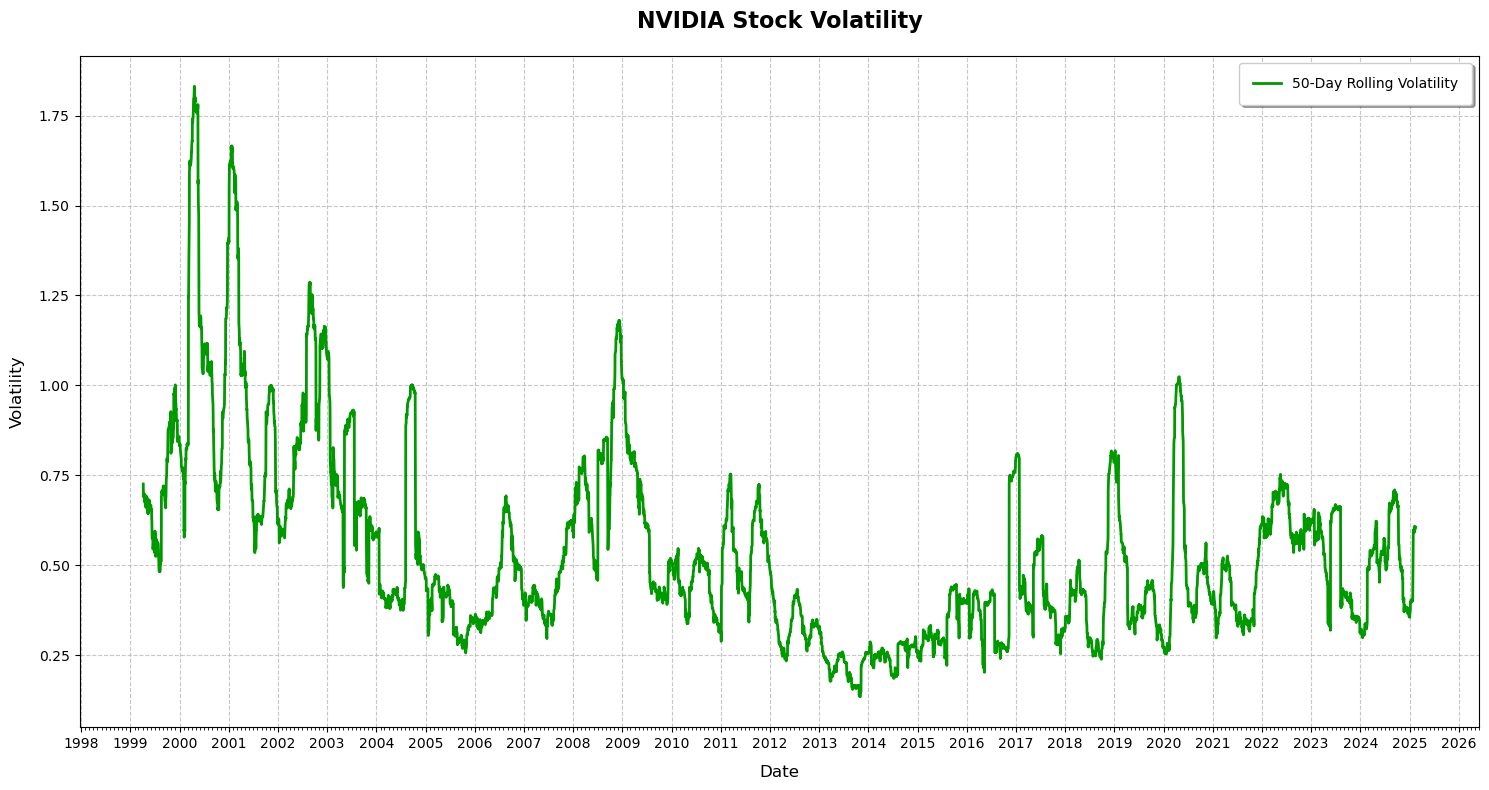

In [13]:
# Calculate Daily Returns
NVIDIA_Stocks['Daily_Return'] = NVIDIA_Stocks['Close'].pct_change()

# Calculate Annualized Volatility
NVIDIA_Stocks['Volatility'] = NVIDIA_Stocks['Daily_Return'].rolling(window=50).std() * (252 ** 0.5)

# Plot the Volatility
plt.figure(figsize=(15, 8))
plt.plot(NVIDIA_Stocks['Date'], NVIDIA_Stocks['Volatility'], label='50-Day Rolling Volatility', color='#009900', linewidth=2)

# Add title and labels
plt.title('NVIDIA Stock Volatility', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12, labelpad=10)
plt.ylabel('Volatility', fontsize=12, labelpad=10)

# Optimize xticks
ax = plt.gca()  # Get the current axis
ax.xaxis.set_major_locator(mdates.YearLocator())  # Major ticks for each year
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # Minor ticks for each month
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format major ticks as years

# Optimize yticks
# Format y-axis labels to display two decimal places
plt.gca().yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Customize legend
plt.legend(loc='upper right', fontsize=10, frameon=True, shadow=True, borderpad=1)

# Add a tight layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.show()

## Seasonal Decomposition

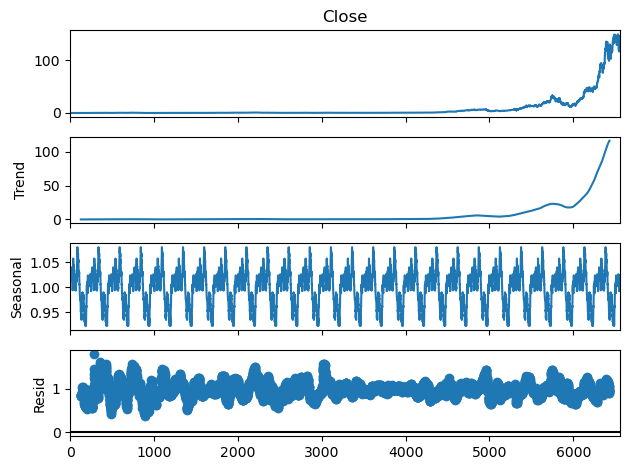

In [14]:
# Seasonal Decomposition
result = seasonal_decompose(NVIDIA_Stocks['Close'], model='multiplicative', period=252)  # 252 trading days in a year
result.plot()
plt.show()